In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# car nameを除いてデータを読み込む

path_train = "train.tsv"
path_test = "test.tsv"

def load_data(path):
    df = pd.read_csv(path, delimiter="\t")
    df = df.drop(["id"], axis=1)
    return df

df_train_original = load_data(path_train)
df_test_original = load_data(path_test)

print(df_train_original.dtypes)
df_train_original.head()

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [3]:
# "?"をnp.nanに変更する

def replace_to_nan(df):
    df["horsepower"] = df["horsepower"].replace("?", np.nan).astype(float)
    df
    return df

df_train_replaced = replace_to_nan(df_train_original)
df_test_replaced = replace_to_nan(df_test_original)

df_train_replaced.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel


In [4]:
# np.nanを平均値で置換する

def replace_nan_to_mean_value(df):
    mean = df["horsepower"].mean()
    df["horsepower"].fillna(mean, inplace=True)
    return df

df_train = replace_nan_to_mean_value(df_train_replaced)
df_test = replace_nan_to_mean_value(df_test_replaced)

df_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel


In [19]:
def concatenate_train_test(df_train, df_test):
    df1 = df_train.drop("mpg", axis=1)
    df2 = df_test
    df3 = pd.concat([df1,df2],axis=0)
    return df3

df_concat = concatenate_train_test(df_train, df_test)
df_concat

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...
194,4,114.0,91.0,2582.0,14.0,73,2,audi 100ls
195,4,156.0,105.0,2800.0,14.4,80,1,dodge colt
196,4,111.0,80.0,2155.0,14.8,77,1,buick opel isuzu deluxe
197,8,400.0,180.0,4220.0,11.1,77,1,pontiac grand prix lj


In [35]:
df_concat["car name"].values.tolist()[2].split(" ")[0]

'toyota'

In [36]:
len_concat = len(df_concat["car name"].values.tolist())
print(len_concat)

list_brand = []

for i in range(len_concat):
    item = df_concat["car name"].values.tolist()[i].split(" ")[0]
    list_brand.append(item)

398


In [37]:
list_brand

['dodge',
 'vw',
 'toyota',
 'dodge',
 'toyota',
 'pontiac',
 'chevroelt',
 'oldsmobile',
 'bmw',
 'dodge',
 'mercedes-benz',
 'dodge',
 'datsun',
 'chevrolet',
 'amc',
 'renault',
 'chevrolet',
 'chevrolet',
 'peugeot',
 'datsun',
 'ford',
 'mercury',
 'subaru',
 'chevrolet',
 'amc',
 'mercury',
 'pontiac',
 'dodge',
 'chevrolet',
 'oldsmobile',
 'honda',
 'chevrolet',
 'volkswagen',
 'toyota',
 'saab',
 'toyota',
 'amc',
 'subaru',
 'mazda',
 'pontiac',
 'volkswagen',
 'plymouth',
 'ford',
 'amc',
 'ford',
 'ford',
 'chevrolet',
 'dodge',
 'honda',
 'honda',
 'opel',
 'chevrolet',
 'chevy',
 'pontiac',
 'capri',
 'datsun',
 'amc',
 'fiat',
 'hi',
 'toyota',
 'volkswagen',
 'bmw',
 'toyota',
 'ford',
 'toyouta',
 'audi',
 'chevrolet',
 'chevrolet',
 'ford',
 'chevrolet',
 'dodge',
 'opel',
 'datsun',
 'plymouth',
 'buick',
 'ford',
 'peugeot',
 'ford',
 'datsun',
 'amc',
 'volkswagen',
 'dodge',
 'chevrolet',
 'chevrolet',
 'dodge',
 'plymouth',
 'volkswagen',
 'chevrolet',
 'mercury'

In [7]:
df_ = pd.concat([df_concat.reset_index(drop=True), pd.DataFrame(list_brand, columns=["brand"])], axis=1)
df_1 = df_.drop("car name", axis=1)
df_1.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
0,4,135.0,84.0,2525.0,16.0,82,1,dodge
1,4,89.0,71.0,1925.0,14.0,79,2,vw
2,6,156.0,108.0,2930.0,15.5,76,3,toyota
3,4,90.0,75.0,2125.0,14.5,74,1,dodge
4,4,89.0,62.0,2050.0,17.3,81,3,toyota


In [8]:
df_1["brand"].unique()

array(['dodge', 'vw', 'toyota', 'pontiac', 'chevroelt', 'oldsmobile',
       'bmw', 'mercedes-benz', 'datsun', 'chevrolet', 'amc', 'renault',
       'peugeot', 'ford', 'mercury', 'subaru', 'honda', 'volkswagen',
       'saab', 'mazda', 'plymouth', 'opel', 'chevy', 'capri', 'fiat',
       'hi', 'toyouta', 'audi', 'buick', 'vokswagen', 'volvo', 'triumph',
       'chrysler', 'mercedes', 'maxda', 'cadillac', 'nissan'],
      dtype=object)

In [9]:
def change_names(df):
    df["brand"].replace("chevroelt", "chevrolet", inplace=True)
    df["brand"].replace("vw", "volkswagen", inplace=True)
    df["brand"].replace("vokswagen", "volkswagen", inplace=True)
    df["brand"].replace("toyouta", "toyota", inplace=True)
    df["brand"].replace("mercedes-benz", "mercedes", inplace=True)
    df["brand"].replace("maxda", "mazda", inplace=True)
    return df

df_2 = change_names(df_1)
df_2.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
0,4,135.0,84.0,2525.0,16.0,82,1,dodge
1,4,89.0,71.0,1925.0,14.0,79,2,volkswagen
2,6,156.0,108.0,2930.0,15.5,76,3,toyota
3,4,90.0,75.0,2125.0,14.5,74,1,dodge
4,4,89.0,62.0,2050.0,17.3,81,3,toyota


In [10]:
df_2["brand"].unique()

array(['dodge', 'volkswagen', 'toyota', 'pontiac', 'chevrolet',
       'oldsmobile', 'bmw', 'mercedes', 'datsun', 'amc', 'renault',
       'peugeot', 'ford', 'mercury', 'subaru', 'honda', 'saab', 'mazda',
       'plymouth', 'opel', 'chevy', 'capri', 'fiat', 'hi', 'audi',
       'buick', 'volvo', 'triumph', 'chrysler', 'cadillac', 'nissan'],
      dtype=object)

In [11]:
import category_encoders as ce

list_col = ["brand"]

def do_category_encoding(df, list_cols):
    ce_oe = ce.OrdinalEncoder(cols=list_cols, handle_unknown="impute")
    df_encoding = ce_oe.fit_transform(df)
    return df_encoding

df_ce0 = do_category_encoding(df_2, list_col)
df_ce0.head()    

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
0,4,135.0,84.0,2525.0,16.0,82,1,1
1,4,89.0,71.0,1925.0,14.0,79,2,2
2,6,156.0,108.0,2930.0,15.5,76,3,3
3,4,90.0,75.0,2125.0,14.5,74,1,1
4,4,89.0,62.0,2050.0,17.3,81,3,3


In [12]:
def resplit_train_test(df):
    df_train = df.iloc[:199, :]
    df_test = df.iloc[199:,:]
    return df_train, df_test

df_train02, df_test02 = resplit_train_test(df_ce0)

In [13]:
print(len(df_train02))
print(len(df_test02))

199
199


In [14]:
df_train02.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
0,4,135.0,84.0,2525.0,16.0,82,1,1
1,4,89.0,71.0,1925.0,14.0,79,2,2
2,6,156.0,108.0,2930.0,15.5,76,3,3
3,4,90.0,75.0,2125.0,14.5,74,1,1
4,4,89.0,62.0,2050.0,17.3,81,3,3


In [15]:
df_train03 = pd.concat([df_train02, df_train_original["mpg"]],axis=1)
df_train03.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,mpg
0,4,135.0,84.0,2525.0,16.0,82,1,1,29.0
1,4,89.0,71.0,1925.0,14.0,79,2,2,31.9
2,6,156.0,108.0,2930.0,15.5,76,3,3,19.0
3,4,90.0,75.0,2125.0,14.5,74,1,1,28.0
4,4,89.0,62.0,2050.0,17.3,81,3,3,37.7


In [16]:
df_train03.to_csv("./try1/train_processed.csv", index=False)
df_test02.to_csv("./try1/test_processed.csv", index=False)

In [17]:
import seaborn as sns

<Axes: >

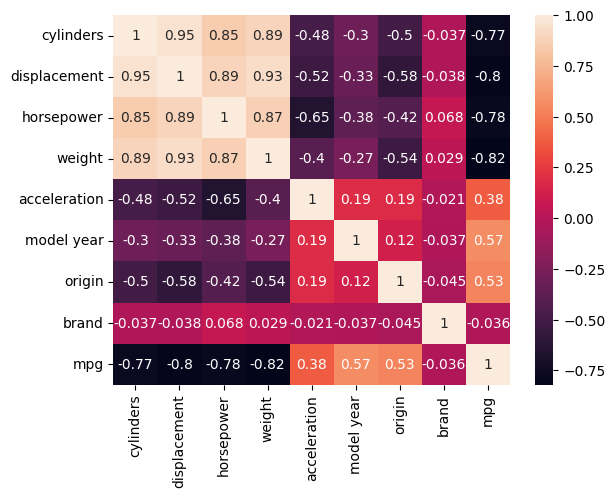

In [18]:
sns.heatmap(df_train03.corr(), annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc894d210a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc894d214c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc894eb7dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc894d21a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc894d21cd0>],
 'means': []}

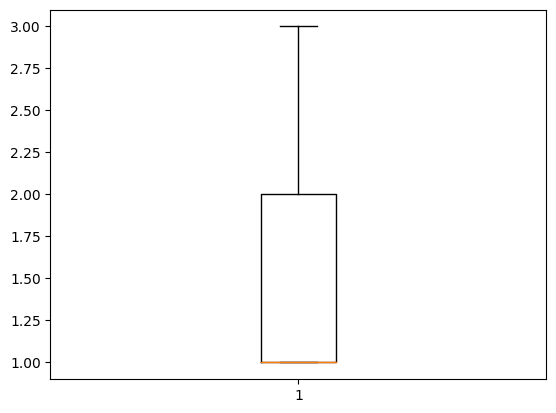

In [43]:
plt.boxplot(df_train03["origin"])